In [65]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [67]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [68]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-53.930600730631866 -59.642472997920464
35.889630230807086 47.64947414253504
-71.30097060907187 139.4352687399121
23.869199203175754 41.656429845573285
84.10690739077884 -134.34546145124892
-34.54766959221178 -178.78364844087514
17.01861661532196 -137.12722681200302
-56.022827105854574 98.56567043732827
7.498987329531246 64.63546778697753
-83.2772962768037 89.59650666356197
23.171131935887658 155.63060857760382
-20.845258545521105 11.493882708778898
-77.39595917211811 -91.68239824734496
62.04208084537203 -113.49145647313854
74.13766662142484 12.997681135466763
-72.58931823759046 -46.047323848772976
-13.878238103096834 -97.10315355369737
16.407162955459285 0.9600637019478029
35.54234670428288 49.77368301422308
-71.46313298874549 -107.69079725075107
-78.4776693514639 165.62000942940585
22.344901924808312 -179.52787479567002
21.02442019800428 -21.43447850226417
61.08266330037708 -166.6051719708043
70.6665453474881 -8.271224375099564
70.0174767288427 -35.197790780774824
17.787802085481275 

-3.713282152482819 165.14079895307532
-21.102078439929628 -11.451563519509534
-78.30556408015522 11.823129825959256
36.26650085936066 -166.2093104202767
-43.78227552864851 -160.19637940193846
-73.11815908026088 77.33190973105349
54.88522751269778 97.23682601074302
-0.22801330463387615 165.76934130977025
-28.38691815251135 164.5854925818433
1.9961704778825577 -5.969277636740884
-11.698799266424729 122.77822563956266
66.51340540860068 -77.11527537522478
85.49584854162416 87.53190377627118
-47.97881051845142 -61.85883610947802
-88.77718846907185 5.712953289281927
75.40134306801335 -90.15913142594185
38.68102260512765 46.5402137217404
-31.800818931178988 114.92102308825952
-13.428429532185618 63.6607845243621
21.91585079341762 125.19609885507697
-71.9042521931683 18.53873839381467
-6.1536844270975735 -124.7142427341079
41.081767627651516 -71.98841598534955
59.493683254664575 -31.493715884229175
-74.36995105250773 -76.44297591515388
-58.85533854847877 18.19960851370371
-22.298977624060356 -

32.87473798695282 178.77936176582256
32.35730558533032 -57.650437296800504
79.88208783693423 -97.44071574204892
-8.453318655057444 73.88865413515452
83.6435425249274 57.46797877030258
-40.548499071603494 154.40050198217335
80.4961445881352 53.07071991861383
21.639377024810713 52.61424785273158
50.32045287053859 162.16542443757226
-50.2061860269917 -14.328229272898
-65.65678856996766 47.241036712837655
54.66163143741153 -135.47363567078327
-17.55348805665615 127.1705282349887
-70.35077947430047 41.65443763819138
-63.89275352661507 20.791668547925127
36.441021463249854 107.80434102316542
-79.9858079346218 -163.33050130330602
-56.827706443079315 -66.16512349278561
-12.081779591547544 85.10365866601722
-9.113397551546527 -127.55343002701221
61.632670695283025 -164.2894294967169
-49.96502931657706 -28.00925711691471
-53.04582852893692 143.84792296100784
12.624885609664489 14.267304598042216
-22.459780620469417 -121.10449899152468
12.331568884437985 88.98100888581604
-29.0387950595279 29.893

In [69]:
from citipy import citipy

In [70]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

580

In [71]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [72]:
# Import the requests library.
import requests

# Import the API key.
from Config import weather_api_key

In [73]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [74]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1



# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i%50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | bijar
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | mecca
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | kulhudhuffushi
Processing Record 10 of Set 1 | hasaki
Processing Record 11 of Set 1 | henties bay
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | gao
Processing Record 17 of Set 1 | takestan
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | nouadhibou
Processing Record 21 of Set 1 | nome
Processing Record 22 of Set 1 | vestmanna
Processing Record 23 o

Processing Record 35 of Set 4 | iaciara
Processing Record 36 of Set 4 | kutum
Processing Record 37 of Set 4 | thompson
Processing Record 38 of Set 4 | new norfolk
Processing Record 39 of Set 4 | lavrentiya
Processing Record 40 of Set 4 | manitouwadge
Processing Record 41 of Set 4 | klaksvik
Processing Record 42 of Set 4 | ouadda
Processing Record 43 of Set 4 | bullhead city
Processing Record 44 of Set 4 | smithers
Processing Record 45 of Set 4 | buribay
Processing Record 46 of Set 4 | victoria
Processing Record 47 of Set 4 | tezu
Processing Record 48 of Set 4 | cayenne
Processing Record 49 of Set 4 | oulu
Processing Record 50 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 1 of Set 5 | timra
Processing Record 2 of Set 5 | praia da vitoria
Processing Record 3 of Set 5 | asfi
Processing Record 4 of Set 5 | nelson bay
Processing Record 5 of Set 5 | korla
Processing Record 6 of Set 5 | banda aceh
Processing Record 7 of Set 5 | barcelos
Processing Record 8 of Set 5 | pow

Processing Record 25 of Set 8 | san mateo del mar
Processing Record 26 of Set 8 | aitape
Processing Record 27 of Set 8 | nyurba
Processing Record 28 of Set 8 | burica
City not found. Skipping...
Processing Record 29 of Set 8 | emerald
Processing Record 30 of Set 8 | matagami
Processing Record 31 of Set 8 | pedasi
Processing Record 32 of Set 8 | tucuman
Processing Record 33 of Set 8 | half moon bay
Processing Record 34 of Set 8 | araguatins
City not found. Skipping...
Processing Record 35 of Set 8 | havoysund
Processing Record 36 of Set 8 | klyuchi
Processing Record 37 of Set 8 | sungairaya
Processing Record 38 of Set 8 | nayoro
Processing Record 39 of Set 8 | conceicao da barra
Processing Record 40 of Set 8 | kavaratti
Processing Record 41 of Set 8 | karaul
City not found. Skipping...
Processing Record 42 of Set 8 | springville
Processing Record 43 of Set 8 | ambon
Processing Record 44 of Set 8 | scottsbluff
Processing Record 45 of Set 8 | monte alegre
Processing Record 46 of Set 8 | m

Processing Record 13 of Set 12 | mareeba
Processing Record 14 of Set 12 | waingapu
Processing Record 15 of Set 12 | nuuk
Processing Record 16 of Set 12 | coihaique
Processing Record 17 of Set 12 | shellbrook
Processing Record 18 of Set 12 | beringovskiy
Processing Record 19 of Set 12 | pedernales
Processing Record 20 of Set 12 | sinegorye
Processing Record 21 of Set 12 | owando
Processing Record 22 of Set 12 | acapulco
Processing Record 23 of Set 12 | petoa
Processing Record 24 of Set 12 | oktyabrskiy
Processing Record 25 of Set 12 | balimo
City not found. Skipping...
Processing Record 26 of Set 12 | acaponeta
Processing Record 27 of Set 12 | bayan
Processing Record 28 of Set 12 | novo oriente
Processing Record 29 of Set 12 | xai-xai
Processing Record 30 of Set 12 | emba
-----------------------------
Data Retrieval Complete      
-----------------------------


In [75]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,35.46,99,100,4.14,AR,2022-07-13 01:00:16
1,Bijar,35.8668,47.6051,67.19,42,9,6.53,IR,2022-07-13 01:01:52
2,Hobart,-42.8794,147.3294,48.25,84,75,5.75,AU,2022-07-13 00:57:29
3,Mecca,21.4267,39.8261,88.65,31,100,3.89,SA,2022-07-13 00:58:31
4,Tuktoyaktuk,69.4541,-133.0374,36.88,94,100,11.30,CA,2022-07-13 01:01:53
5,Vaini,-21.2000,-175.2000,76.59,73,1,13.53,TO,2022-07-13 01:01:53
6,Hilo,19.7297,-155.0900,86.29,90,8,8.01,US,2022-07-13 01:00:24
7,Busselton,-33.6500,115.3333,55.31,79,20,8.90,AU,2022-07-13 01:01:54
8,Kulhudhuffushi,6.6221,73.0700,81.95,76,97,13.69,MV,2022-07-13 01:01:54
9,Hasaki,35.7333,140.8333,77.40,90,100,6.33,JP,2022-07-13 01:01:54


In [94]:
city_data_new_df = city_data_df.reindex(columns=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed'])


In [95]:
city_data_new_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-07-13 01:00:16,-54.8000,-68.3000,35.46,99,100,4.14
1,Bijar,IR,2022-07-13 01:01:52,35.8668,47.6051,67.19,42,9,6.53
2,Hobart,AU,2022-07-13 00:57:29,-42.8794,147.3294,48.25,84,75,5.75
3,Mecca,SA,2022-07-13 00:58:31,21.4267,39.8261,88.65,31,100,3.89
4,Tuktoyaktuk,CA,2022-07-13 01:01:53,69.4541,-133.0374,36.88,94,100,11.30
5,Vaini,TO,2022-07-13 01:01:53,-21.2000,-175.2000,76.59,73,1,13.53
6,Hilo,US,2022-07-13 01:00:24,19.7297,-155.0900,86.29,90,8,8.01
7,Busselton,AU,2022-07-13 01:01:54,-33.6500,115.3333,55.31,79,20,8.90
8,Kulhudhuffushi,MV,2022-07-13 01:01:54,6.6221,73.0700,81.95,76,97,13.69
9,Hasaki,JP,2022-07-13 01:01:54,35.7333,140.8333,77.40,90,100,6.33


In [97]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [98]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

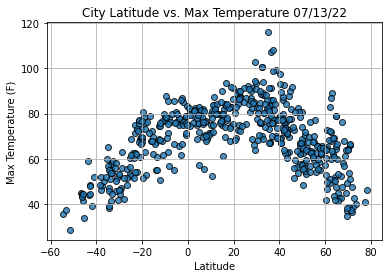

In [99]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

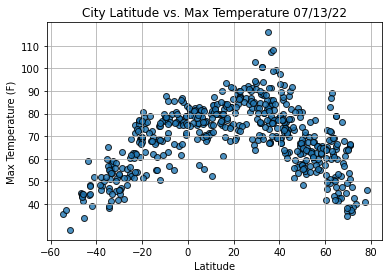

In [110]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.yticks( range(40,120,10) )
# Incorporate the other graph properties.
# Setting the interval of ticks of y-axis to 10.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

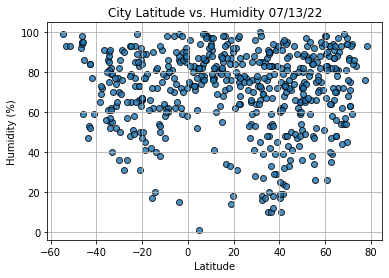

In [111]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

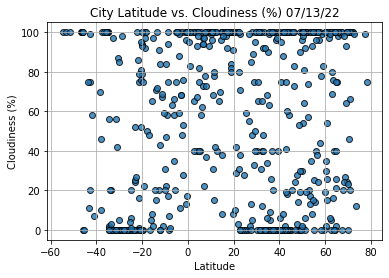

In [112]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

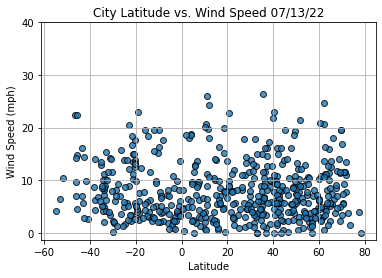

In [115]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.yticks( range(0,50,10) )
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()